**Our Problem Statement is to analyze the dataset of properties in Lahore and then building a model to predict its price using location, Area(Sq.ft), bedrooms, baths...**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Property_with_Feature_Engineering.csv')

In [53]:
df.head(2)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B


In [54]:
## Checking which cities of Pakistan are present in the dataset
print(df['city'].unique())


['Lahore' 'Karachi' 'Islamabad' 'Faisalabad' 'Rawalpindi']


In [55]:
df.shape

(191393, 24)

In [56]:
data = df[df['city']=='Lahore']
data.shape

(58736, 24)

In [57]:
# dropping unnecessary columns

col_names = ["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"]
data = data.drop(col_names, axis=1)

In [8]:
data = data.reset_index()
data = data.drop("index",axis=1)
data.head()

,price,location,baths,area_sqft,bedrooms
0,220000000,Model Town,0,32670.12,0
1,40000000,Multan Road,5,5445.02,5
2,9500000,Eden,0,2450.26,3
3,125000000,Gulberg,7,5445.02,8
4,21000000,Allama Iqbal Town,5,2994.76,6


In [58]:
data.isnull().sum()

price        0
location     0
baths        0
area_sqft    0
bedrooms     0
dtype: int64

In [59]:
data['bedrooms'].unique()

array([ 0,  5,  3,  8,  6,  4,  2,  7,  1, 10, 11,  9, 14, 12, 13, 18, 15,
       16, 25, 20])

In the above cell, there are some properties which have bedrooms even greater than 10...This could be possible that some of them could be typo error while others can be having other errors in them as well like very less baths or no baths...Lets inspect the properties that are having bedrooms more than 13

In [60]:
data[data['bedrooms']>13]

,price,location,baths,area_sqft,bedrooms
3289,100000000,Garden Town,0,10890.04,14
72974,650000000,Gulberg,0,25047.09,18
80626,175000000,Shah Jamal,0,26136.10,15
101183,350000000,Gulberg,0,17424.06,16
131683,175000000,Shah Jamal,0,26136.10,15
136376,960000000,Gulberg,0,43560.16,25
179913,960000000,Gulberg,0,43560.16,25
182238,1000000,Gulberg,0,21780.08,20
189608,300000,Habibullah Road,0,8712.03,20


In [61]:
data['baths'].unique()

array([ 0,  5,  7,  6,  4,  3,  2,  8,  1, 10,  9, 11, 12, 15])

In [62]:
data = data.drop(data[(data['baths']==0) & (data['bedrooms'] > 3)].index)
data

,price,location,baths,area_sqft,bedrooms
0,220000000,Model Town,0,32670.12,0
1,40000000,Multan Road,5,5445.02,5
2,9500000,Eden,0,2450.26,3
3,125000000,Gulberg,7,5445.02,8
4,21000000,Allama Iqbal Town,5,2994.76,6
...,...,...,...,...,...
191247,32000,Allama Iqbal Town,0,2722.51,2
191249,185000,DHA Defence,6,5445.02,5
191250,150000,DHA Defence,5,2722.51,4
191251,70000,DHA Defence,3,5445.02,3


In the above cell we have dropped those indexes that are having no baths and having bedrooms greater than 3 cause they can probably be a typo error.

In [63]:
data.drop(data[data['bedrooms']==0 | (data['baths']==0)].index, inplace=True)


We have also dropped those properties that are either having no bedrooms or no baths in the above cell...

In [64]:
data[data["baths"] > data["bedrooms"]].head(25)

,price,location,baths,area_sqft,bedrooms
5,52000000,Gulberg,6,5445.02,5
6,16500000,Military Accounts Housing Society,7,2178.01,6
11,87500000,Upper Mall,5,6534.02,4
17,50000000,Agrics Town,7,4900.52,6
19,27500000,Askari,5,3267.01,4
21,50000000,Upper Mall,6,5445.02,5
22,45000000,Askari,6,5445.02,5
24,21200000,Askari,4,2722.51,3
25,23000000,Askari,5,2722.51,4
26,21500000,Askari,5,2722.51,4


Look at the above cell , as there are more number of baths than bedrooms and its very uncommon

In [65]:
data['Price_per_sqft'] = data['price']/data['area_sqft']

In [66]:
data.head()

,price,location,baths,area_sqft,bedrooms,Price_per_sqft
0,220000000,Model Town,0,32670.12,0,6733.981999
1,40000000,Multan Road,5,5445.02,5,7346.162181
2,9500000,Eden,0,2450.26,3,3877.139569
3,125000000,Gulberg,7,5445.02,8,22956.756816
4,21000000,Allama Iqbal Town,5,2994.76,6,7012.248060


In the above cell, We have added one new column for our Feature Engineering so that we can remove outliers easily.

In [67]:
len(data['location'].unique())

637

In [68]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(20)

location
DHA Defence                   10666
Bahria Town                    6178
Johar Town                     2830
Askari                         1592
Allama Iqbal Town              1324
Wapda Town                     1277
Gulberg                        1209
State Life Housing Society     1067
Model Town                      940
Cantt                           869
Al Rehman Garden                783
Paragon City                    783
Sabzazar Scheme                 625
Samanabad                       607
Pak Arab Housing Society        587
Bahria Orchard                  584
Eden                            538
Valencia Housing Society        483
DHA 11 Rahbar                   471
Township                        470
Name: location, dtype: int64

In [69]:
len(location_stats[location_stats <= 10])

356

Notice that there are 356 locations that are having properties less than 10 so we can categorize them as others which will help us in dimensionality reduction in our machine learning model.

In [70]:
locations10 = location_stats[location_stats <= 10]
data['location'] = data['location'].apply(lambda x:'others' if x in locations10 else x)

In [71]:
data['location'].nunique()

282

Firstly there were 356 locations now we have 282 unique locations after dimensionality reduction.

In [72]:
data[data['area_sqft'] / data['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,Price_per_sqft
23,3200000,Chungi Amar Sadhu,2,816.75,3,3917.967554
35,5500000,others,3,680.63,3,8080.748718
71,6000000,Allama Iqbal Town,2,544.50,3,11019.283747
72,5500000,Allama Iqbal Town,2,544.50,3,10101.010101
119,4500000,Al Faisal Town,3,544.50,3,8264.462810
...,...,...,...,...,...,...
191027,24000,Harbanspura,0,816.75,3,29.384757
191030,16000,Canal Bank Housing Scheme,0,544.50,3,29.384757
191036,8500,Gulberg,1,299.48,1,28.382530
191040,6000,Gulberg,1,299.48,1,20.034727


In the above cell we assume that on  minimum a bedroom must be more than 300 sq.ft so those that were not following that rule in our data we will be removing them as they will be considering them as outliers...

In [73]:
data.drop(data[data['area_sqft'] / data['bedrooms'] < 300].index, inplace = True)

In [74]:
data['Price_per_sqft'].describe()

count     47030.000000
mean       5878.357118
std        4442.900641
min           0.000735
25%          47.750054
50%        6795.200018
75%        8631.740563
max      106519.742883
Name: Price_per_sqft, dtype: float64

Notice how much it is having standard deviation we are going to reduce it...

In [75]:
# removing price_per_sqft outliers 

def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key,subdata in data.groupby('location'):
        m = np.mean(subdata['Price_per_sqft'])
        std = np.std(subdata['Price_per_sqft'])
        reduced_data = subdata[(subdata['Price_per_sqft'] > (m-std)) & (subdata['Price_per_sqft'] <= (m+std))]
        data_out = pd.concat([data_out,reduced_data], ignore_index=True)
    return data_out

In [76]:
data = remove_pps_outliers(data)
data.shape

(31002, 6)

In [77]:
import matplotlib
def plot_scatter_chart(data, location):
    bedroom_2 = data[(data['location'] == location) & (data['bedrooms'] == 2)]
    bedroom_3 = data[(data['location'] == location) & (data['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

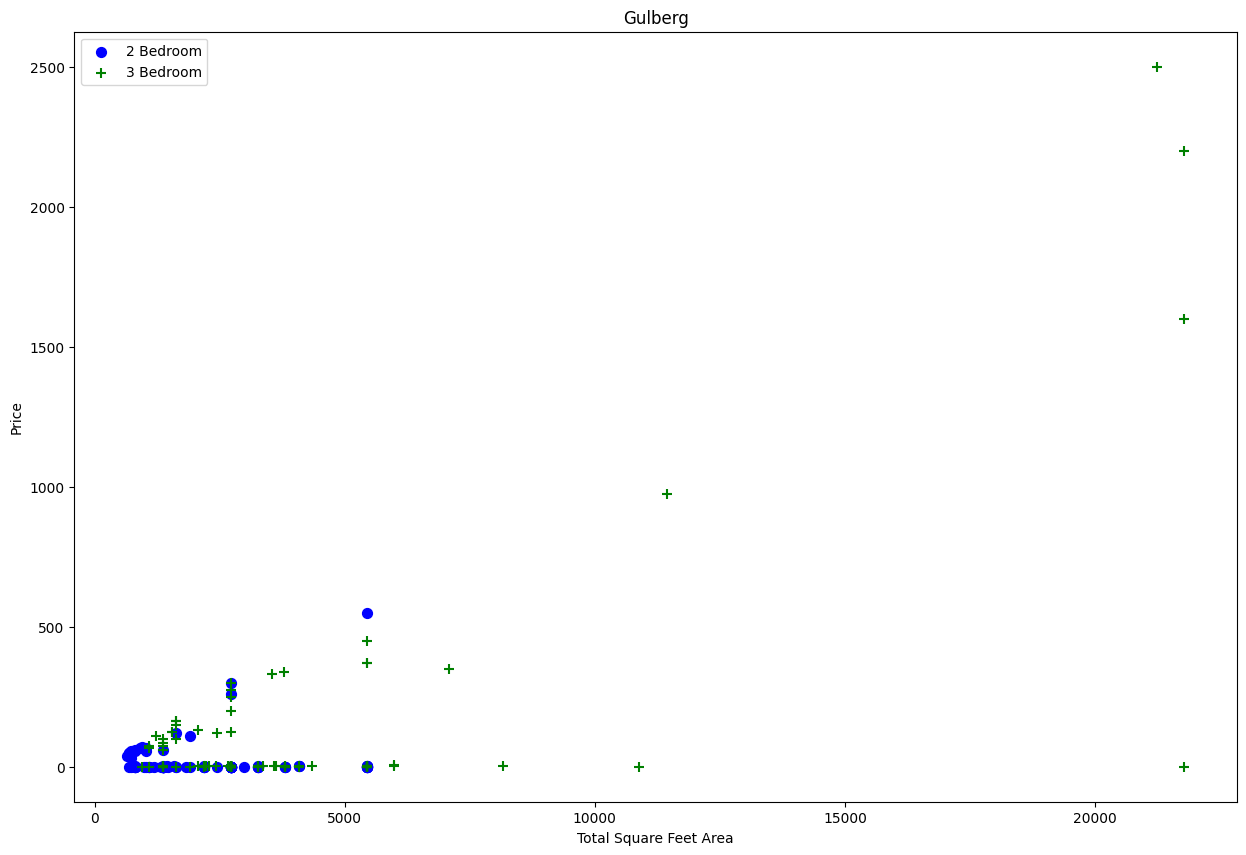

In [78]:
plot_scatter_chart(data, "Gulberg")

Notice in the above graph that there are some properties having 3 bedrooms still in less price than 2 bedrooms properties in a specfied location. Now they can also be considered as outliers and we should also remove them so that they cannot affect our model performance

In [79]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_data in data.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_data in location_data.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_data["Price_per_sqft"]),
                'std' : np.std(bedroom_data["Price_per_sqft"]),
                'count': bedroom_data.shape[0]
            }
        for bedroom, bedroom_data in location_data.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_data[bedroom_data['Price_per_sqft'] < (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis="index") 

In [80]:
data = remove_bhk_outliers(data)
data.shape

(19984, 6)

In [81]:
data.groupby('location')['location'].agg('count').sort_values(ascending=False).head(40)

location
Bahria Town                          2942
DHA Defence                          2601
Askari                                734
Johar Town                            661
Paragon City                          538
State Life Housing Society            462
others                                456
Gulberg                               443
Allama Iqbal Town                     396
DHA 11 Rahbar                         348
Wapda Town                            337
Model Town                            322
Cantt                                 322
Park View Villas                      318
Al Rehman Garden                      303
Military Accounts Housing Society     290
Eden                                  283
Pak Arab Housing Society              267
Township                              229
Lake City                             226
Valencia Housing Society              194
Khayaban-e-Amin                       178
EME Society                           154
Sabzazar Scheme          

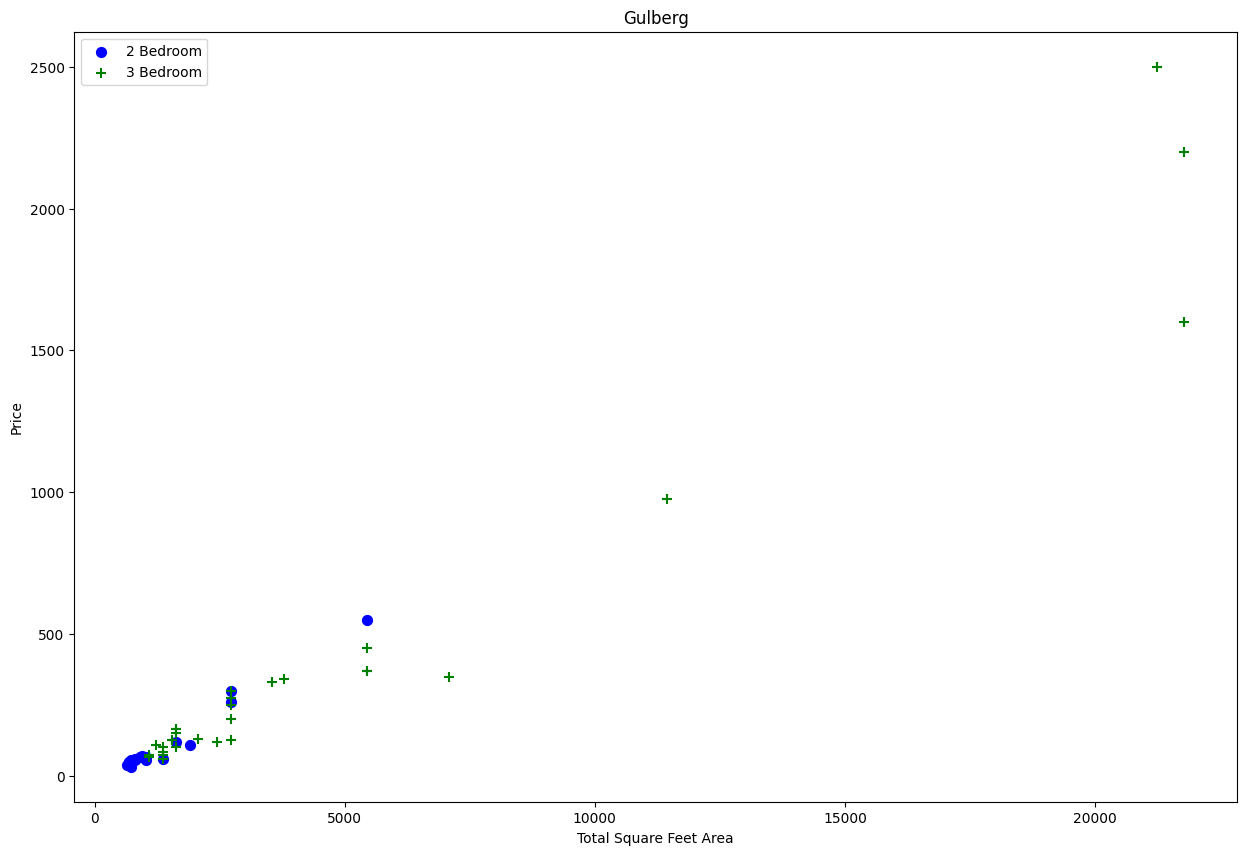

In [82]:
plot_scatter_chart(data, "Gulberg")

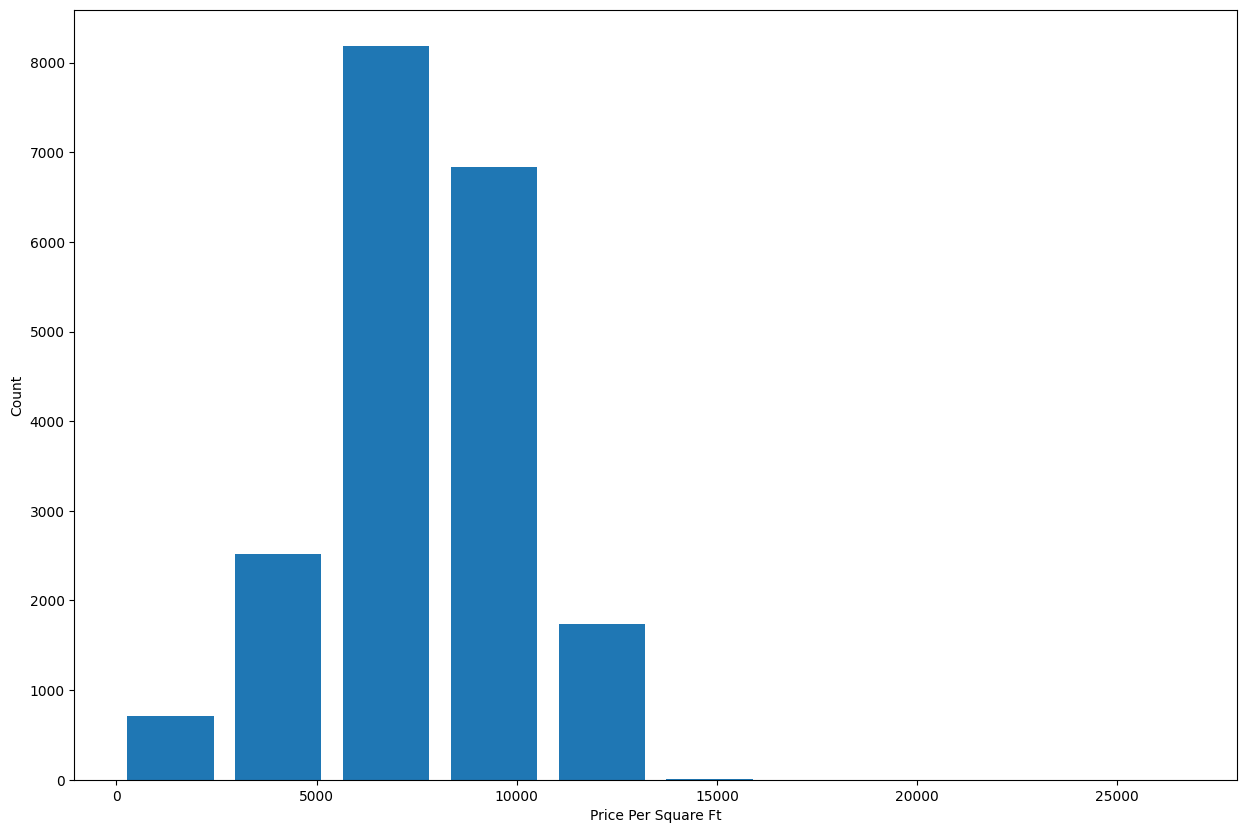

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data['Price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

In above chart , see that 6000 to 1000 is a common price

In [84]:
data[data['baths'] > data['bedrooms']]

,price,location,baths,area_sqft,bedrooms,Price_per_sqft
1,19000000,AWT Army Welfare Trust,4,5445.02,3,3489.427036
3,21000000,AWT Army Welfare Trust,6,5445.02,5,3856.735145
7,5800000,AWT Army Welfare Trust,3,2722.51,2,2130.387033
9,9000000,AWT Army Welfare Trust,3,2722.51,2,3305.772982
17,2800000,Aashiana Road,2,544.50,1,5142.332415
...,...,...,...,...,...,...
30985,20000000,others,7,2722.51,5,7346.162181
30991,18500000,others,5,2722.51,4,6795.200018
30992,15000000,others,4,1905.76,3,7870.875661
30993,40000000,others,6,5445.02,5,7346.162181


In [85]:
data[data['baths'] > (data['bedrooms'] + 2)]

,price,location,baths,area_sqft,bedrooms,Price_per_sqft
703,40000,Al-Kabir Town,8,43560.16,5,0.918270
2208,14000000,Askari,7,2722.51,3,5142.313527
3306,11800000,Bahria Town,6,1361.25,3,8668.503214
3658,11200000,Bahria Town,6,1361.25,3,8227.731864
3719,50000000,Bahria Town,9,5445.02,5,9182.702727
...,...,...,...,...,...,...
29318,65000000,Valencia Housing Society,8,10890.04,5,5968.756772
29352,75000000,Valencia Housing Society,10,10890.04,7,6887.027045
30382,19500000,others,5,2722.51,2,7162.508127
30645,17500000,others,8,2722.51,5,6427.891909


In [86]:
data = data.drop(data[data['baths'] > (data['bedrooms'] + 2)].index)
data.shape

(19892, 6)

In [87]:
dff = data.drop("Price_per_sqft", axis=1)

As we had added the column price_per_sqft for our dimensionality reduction we will now remove this column as this is not a feature for predicting property pricing...

In [88]:
dummies = pd.get_dummies(dff['location'])
dummies.head(3)

,AWT Army Welfare Trust,Aashiana Road,Abdali Road,Abdalians Cooperative Housing Society,Acro Green - Bankers Avenue,Airline Housing Society,Airport Road,Aitchison Society,Al Faisal Town,Al Hafeez Gardens,...,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony,Zubaida Park,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the above cells we have made the dummies of our locations

In [89]:
dff = pd.concat([dff, dummies.drop('others', axis=1)], axis="columns")
dff = dff.drop("location", axis=1)
dff.head()
dff.shape

(19892, 283)

Now we had concate them in our data

# Model Evaluation

In [90]:
x = dff.drop('price', axis=1) 
x.head()

,baths,area_sqft,bedrooms,AWT Army Welfare Trust,Aashiana Road,Abdali Road,Abdalians Cooperative Housing Society,Acro Green - Bankers Avenue,Airline Housing Society,Airport Road,...,Wahdat Road,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony,Zubaida Park
0,4,2722.51,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,5445.02,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1361.25,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6,5445.02,5,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2722.51,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
y = dff['price'] 
y.head()

0    11000000
1    19000000
2     5000000
3    21000000
4     5600000
Name: price, dtype: int64

As the price of property is continuous so we will be using Regression Models:

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)


0.8797429944005294

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(RandomForestRegressor(), x, y, cv=cv)

array([0.9159492 , 0.88838892, 0.88843934, 0.88185261, 0.87955847])

In [43]:
# importing other regression models to find the best performing model using GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [98]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'random_forest_regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'decision_tree_regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 2],
                'selection': ['random', 'cyclic']
            }
        }
    }

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config['model'],
            config['params'],
            return_train_score=False,
            n_jobs=-1,
            cv=cv
        )
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [ ]:
find_best_model_using_gridsearchcv(x, y)
